         ETL Y EDA

Conjunto de Datos extraidos del observatorio de movvilidad y seguridad vial (OMSV)

Secretaría de Transporte - Subsecretaría de Planificación de la Movilidad


A medida que avanzamos en nuestro EDA, la meta es proporcionar una visión más profunda de la información contenida en nuestros conjuntos de datos y determinar qué campos poseen una relevancia significativa. Este enfoque nos permitirá tomar decisiones informadas durante etapas posteriores del análisis y del proceso de toma de decisiones basada en datos

---------------------------------------------------------------------------------------------

Importamos las librerias que vamos a usar para todo el proceso del EDA

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
from IPython.display import display
from sqlalchemy import create_engine
import numpy as np

Accedemos a los datos

In [3]:
# Utilizamos la ruta relativa
archivo = r'C:\Users\ale_h\Desktop\Henry#\PI individual 2\prueba_ale_2\Datasets\homicidios .xlsx'

Vamos a traer las dos tablas que estan dentro de homicidios.xlsx

In [4]:
# Hacemos los dataframes, con el parametro sheet_name traemos la hoja del archivo excel que queremos
df_homicidios_hechos = pd.read_excel(archivo,sheet_name='HECHOS')
df_homicidios_victimas = pd.read_excel(archivo, sheet_name='VICTIMAS')

Analizamos los datos de la tabla df_homicidios_hechos

In [5]:
df_homicidios_hechos.head()

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS


In [6]:
df_homicidios_hechos.tail()

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
691,2021-0093,1,2021-12-13,2021,12,13,17:10:00,17,AV. RIESTRA Y MOM,AVENIDA,...,NaN,MOM,RIESTRA AV. y MOM,7,Point (102728.60090138 98186.24929177),-58.43353773,-34.64561636,MOTO-AUTO,MOTO,AUTO
692,2021-0094,1,2021-12-20,2021,12,20,01:10:00,1,AU DELLEPIANE Y LACARRA,AUTOPISTA,...,NaN,LACARRA AV.,"DELLEPIANE, LUIS, TTE. GRAL. y LACARRA AV.",9,Point (99624.29795829 97569.69801131),-58.46739825,-34.65117757,MOTO-AUTO,MOTO,AUTO
693,2021-0095,1,2021-12-30,2021,12,30,00:43:00,0,AV. GAONA Y TERRADA,AVENIDA,...,NaN,TERRADA,GAONA AV. y TERRADA,11,Point (99116.45492358 101045.23284826),-58.47293407,-34.61984745,MOTO-CARGAS,MOTO,CARGAS
694,2021-0096,1,2021-12-15,2021,12,15,10:30:00,10,AV. EVA PERON 4071,AVENIDA,...,4071.0,NaN,"PERON, EVA AV. 4071",9,Point (99324.54463985 97676.26932409),-58.47066794,-34.65021673,AUTO-CARGAS,AUTO,CARGAS
695,2021-0097,1,2021-11-18,2021,11,18,06:10:00,6,PADRE CARLOS MUJICA 709,CALLE,...,709.0,NaN,PADRE CARLOS MUGICA 709,1,Point (107664.16647795 104708.63962087),-58.37976155,-34.58679619,BICICLETA-AUTO,BICICLETA,AUTO


In [7]:
df_homicidios_hechos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     696 non-null    object        
 1   N_VICTIMAS             696 non-null    int64         
 2   FECHA                  696 non-null    datetime64[ns]
 3   AAAA                   696 non-null    int64         
 4   MM                     696 non-null    int64         
 5   DD                     696 non-null    int64         
 6   HORA                   696 non-null    object        
 7   HH                     696 non-null    object        
 8   LUGAR_DEL_HECHO        696 non-null    object        
 9   TIPO_DE_CALLE          696 non-null    object        
 10  Calle                  695 non-null    object        
 11  Altura                 129 non-null    float64       
 12  Cruce                  525 non-null    object        
 13  Direc

In [8]:
df_homicidios_hechos.describe()

,N_VICTIMAS,AAAA,MM,DD,Altura,COMUNA
count,696.000000,696.000000,696.000000,696.000000,129.000000,696.000000
mean,1.030172,2018.188218,6.692529,15.936782,3336.635659,7.425287
std,0.179393,1.683754,3.571309,8.639646,3060.641793,4.387050
min,1.000000,2016.000000,1.000000,1.000000,30.000000,0.000000
25%,1.000000,2017.000000,4.000000,9.000000,1359.000000,4.000000
50%,1.000000,2018.000000,7.000000,16.000000,2551.000000,8.000000
75%,1.000000,2020.000000,10.000000,23.000000,4500.000000,11.000000
max,3.000000,2021.000000,12.000000,31.000000,16080.000000,15.000000


El numero de victimas en promedio por cada accidente hay 1 victima fatal.
El maximo de victimas por un accidente es de 3 muertes.

Los datos abarcan desde el año 2016 hasta el 2021.

Se puede ver que en comuna, el min que es el valor minimo de la columna, cuentan a 0 como una comuna pero en realidad debe ser un faltante, ya que en Buenos Aires hay 15 comunas numeradas del 1 al 15.

Verificamos la existencia de duplicados

In [9]:
df_homicidios_hechos.duplicated().sum()

0

Verificamos los  nulos

In [10]:
df_homicidios_hechos.isnull().sum()

ID                         0
N_VICTIMAS                 0
FECHA                      0
AAAA                       0
MM                         0
DD                         0
HORA                       0
HH                         0
LUGAR_DEL_HECHO            0
TIPO_DE_CALLE              0
Calle                      1
Altura                   567
Cruce                    171
Dirección Normalizada      8
COMUNA                     0
XY (CABA)                  0
pos x                      0
pos y                      0
PARTICIPANTES              0
VICTIMA                    0
ACUSADO                    0
dtype: int64

Columnas HH y HORAS

- En la columna hora y HH, tenemos datos nulos representados, como 'SD', lo cual nos trae un problema por el tipo de dato de la columna, lo reemplazamos.

In [11]:
# Creamos una mascara para ver cuantos y cuales valores faltantes tenemos.
mask = df_homicidios_hechos['HH']=='SD'
df_homicidios_hechos[mask]

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
518,2019-0103,1,2019-12-18,2019,12,18,SD,SD,"PAZ, GRAL. AV. Y GRIVEO",GRAL PAZ,...,NaN,GRIVEO,"PAZ, GRAL. AV. y GRIVEO",11,Point (94643.11254058 103831.57115061),-58.52169422,-34.59471640,MOTO-MOTO,MOTO,MOTO


Para tratar este faltante vamos a utilizar la media de las horas, para colocar el valor que falta

In [12]:
# Para tratar este dato faltante primero vamos a reemplazar el valor con nulos
df_homicidios_hechos['HH'] = pd.to_numeric(df_homicidios_hechos['HH'], errors='coerce')
# Como es solo un dato, tome la desicion de poner la media de las horas, para completar este faltante
# Utilizamos round() para redondear la media, y dar un valor int
media_horas = int(round(df_homicidios_hechos['HH'].mean()))
# Vamos a reempazar el valor
df_homicidios_hechos.at[518, 'HH'] = media_horas
# Chequeamos como quedo
df_homicidios_hechos['HH'][518]

12.0

In [13]:
# como nos cambio el tipo de dato de int a float, vamos a volver a cambiar el dato por int
df_homicidios_hechos['HH'] = df_homicidios_hechos['HH'].astype(int)

In [14]:
# reeemplazamos ahora en HORAS con la media
# Asigna el valor constante '12:00:00' a la fila 518
df_homicidios_hechos.at[518, 'HORA'] = pd.to_datetime('12:00:00').time()

In [15]:
# Chequeamos como quedaron los cambios
fila_518 = df_homicidios_hechos.iloc[518]
fila_518

ID                                                    2019-0103
N_VICTIMAS                                                    1
FECHA                                       2019-12-18 00:00:00
AAAA                                                       2019
MM                                                           12
DD                                                           18
HORA                                                   12:00:00
HH                                                           12
LUGAR_DEL_HECHO                         PAZ, GRAL. AV. Y GRIVEO
TIPO_DE_CALLE                                          GRAL PAZ
Calle                                            PAZ, GRAL. AV.
Altura                                                      NaN
Cruce                                                    GRIVEO
Dirección Normalizada                   PAZ, GRAL. AV. y GRIVEO
COMUNA                                                       11
XY (CABA)                Point (94643.11

Columna Calle

- En la columna Calle tenemos un faltante, que esta como vacio.

In [16]:
# Verificamos el valor faltante
mask =df_homicidios_hechos['Calle'].isnull()
df_homicidios_hechos[mask]

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
119,2016-0151,1,2016-11-18,2016,11,18,20:35:00,20,SD,CALLE,...,NaN,NaN,NaN,0,Point (. .),.,.,PEATON-SD,PEATON,SD


Como vemos en esta fila, los faltantes que tiene, y viendo que no podemos saber ni su comuna, o lugar de hecho, ni sus coordenas o el acusado, tome la descion de borrar esta fila, ya que es una sola y tiene muchos datos importantes que estan faltantes

In [17]:
# Eliminamos la fila
# Utilizamos el método drop para eliminar la fila 19
df_homicidios_hechos = df_homicidios_hechos.drop(119)

# Vamos a reiniciar el index
df_homicidios_hechos.reset_index(drop=True, inplace=True)

Columna altura

- La columna de altura, tiene 567 faltantes, muchos de los casos de accidentes viales, fueron en una interseccion de calles, en una esquina, por ende la altura no es relevante, sino el cruce de las calles.Por el momento vamos a mantenerlo asi, pero luego se determinará si es redundante o no, cuando nos llevemos los datos para Power BI para hacer el analisis.

Columna Cruce

- La columna de cruce, tenemos 171 faltantes como vacios que en principio podemos afirmar que se trata de un accidente en la autopista por esa razón no contamos con la informacion del cruce.

Columna Direccion Normalizada

- La columna direccion normalizada tiene 7 faltantes, como vacios.

In [18]:
df_homicidios_hechos['Dirección Normalizada'].isnull().sum()

7

In [19]:
# Vamos a filtrar los resultados para mostrarlos
registros_nulos = df_homicidios_hechos[df_homicidios_hechos['Dirección Normalizada'].isnull()]
# Muestra el DataFrame
registros_nulos

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
38,2016-0052,1,2016-04-20,2016,4,20,20:00:00,20,AUTOPISTA LUGONES PK 10000,AUTOPISTA,...,NaN,NaN,NaN,13,Point (. .),.,.,MOTO-SD,MOTO,SD
106,2016-0136,1,2016-10-25,2016,10,25,00:00:00,0,AU BUENOS AIRES - LA PLATA KM. 4,AUTOPISTA,...,NaN,NaN,NaN,4,Point (. .),.,.,MOTO-CARGAS,MOTO,CARGAS
179,2017-0050,2,2017-04-28,2017,4,28,11:08:08,11,AU PERITO MORENO Y RAMAL ENLACE AU1/AU6,AUTOPISTA,...,NaN,NaN,NaN,9,Point (. .),.,.,MOTO-CARGAS,MOTO,CARGAS
180,2017-0051,1,2017-05-01,2017,5,1,03:47:47,3,AU DELLEPIANE 2400,AUTOPISTA,...,NaN,NaN,NaN,7,Point (. .),.,.,AUTO-AUTO,AUTO,AUTO
312,2018-0039,1,2018-04-21,2018,4,21,22:15:00,22,AUTOPISTA LUGONES KM 4.7,AUTOPISTA,...,NaN,NaN,NaN,14,Point (. .),.,.,PEATON-AUTO,PEATON,AUTO
545,2020-0026,1,2020-05-17,2020,5,17,06:40:00,6,"LUGONES, LEOPOLDO AV. KM 6,1",AUTOPISTA,...,NaN,NaN,NaN,14,Point (. .),.,.,MOTO-OBJETO FIJO,MOTO,OBJETO FIJO
620,2021-0023,1,2021-03-01,2021,3,1,09:20:00,9,"AU BUENOS AIRES LA PLATA KM 4,5",AUTOPISTA,...,NaN,NaN,NaN,4,Point (. .),.,.,MOTO-CARGAS,MOTO,CARGAS


Podemos ver que los faltantes en la columna Dirección Normalizada se debe en a que el accidente fue producido en una autopista, donde los valores que tenemos es la autopista y el kilometro donde sucesido el incidente, por ende lo vamos a dejar como esta

Columna Comuna

- La columna de comuna tiene 0 donde hay faltantes.

In [20]:
# Buscamos los valores en donde comuna tiene 0
# Vamos a filtrar los resultados para mostrarlos
registros_nulos = df_homicidios_hechos[df_homicidios_hechos['COMUNA']== 0 ]
# Muestra el DataFrame
registros_nulos

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
138,2016-0174,1,2016-12-27,2016,12,27,00:00:00,0,AUTOPISTA 25 DE MAYO,AUTOPISTA,...,NaN,NaN,AUTOPISTA 25 DE MAYO,0,Point (. .),.,.,SD-SD,SD,SD


In [21]:
# Eliminamos la fila
# Utilizamos el método drop para eliminar la fila
df_homicidios_hechos = df_homicidios_hechos.drop(138)

# Vamos a reiniciar el index
df_homicidios_hechos.reset_index(drop=True, inplace=True)

Considero eliminar esta fila por ser la unica en no contar informacion sobre la comuna

**Columna XY(CABA)**

- XY(CABA) tiene faltantes, pero considero que esta columna es redundante, ya que contamos con las columnas "posy" y "posx"

**Columnas 'posy', 'posx'**

- posy y posx tienen un '.' donde hay faltantes

In [22]:
# Vamos a ver los faltantes para estas columnas
# Filtra el DataFrame para mostrar solo las filas con valores '.' en 'pos y' o 'pos x'
registros_nulos_pos = df_homicidios_hechos[(df_homicidios_hechos['pos x'] == '.') | (df_homicidios_hechos['pos y'] == '.')]

# Muestra el DataFrame filtrado
print(registros_nulos_pos[['ID','LUGAR_DEL_HECHO', 'pos x', 'pos y']])


            ID                          LUGAR_DEL_HECHO pos x pos y
38   2016-0052               AUTOPISTA LUGONES PK 10000     .     .
106  2016-0136         AU BUENOS AIRES - LA PLATA KM. 4     .     .
174  2017-0042            AV. LEOPOLDO LUGONES PKM 6900     .     .
178  2017-0050  AU PERITO MORENO Y RAMAL ENLACE AU1/AU6     .     .
179  2017-0051                       AU DELLEPIANE 2400     .     .
254  2017-0140              AU ARTURO FRONDIZI PKM 3100     .     .
311  2018-0039                 AUTOPISTA LUGONES KM 4.7     .     .
544  2020-0026             LUGONES, LEOPOLDO AV. KM 6,1     .     .
557  2020-0039                          MURGUIONDO 2700     .     .
619  2021-0023         AU BUENOS AIRES LA PLATA  KM 4,5     .     .


Las faltantes solo representan una porcion menor por lo que considero dejarlas.

En las columnas "pos x" y "pos y" las cuales representan la posicion satelital se encuentran en formato object y las convertiremos a numeric.

In [23]:
# Conversion  de 'pos x' y 'pos y' a numeric y reemplar el "." por ","
df_homicidios_hechos['pos x'] = pd.to_numeric(df_homicidios_hechos['pos x'].str.replace(',', '.'), errors='coerce')
df_homicidios_hechos['pos y'] = pd.to_numeric(df_homicidios_hechos['pos y'].str.replace(',', '.'), errors='coerce')

In [24]:
df_homicidios_hechos[df_homicidios_hechos['COMUNA'] == 13].head(5)

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
32,2016-0045,1,2016-04-11,2016,4,11,10:25:00,10,AV GRAL PAZ Y AV DEL LIBERTADOR,GRAL PAZ,...,NaN,DEL LIBERTADOR AV.,"PAZ, GRAL. AV. y DEL LIBERTADOR AV.",13,Point (99620.34936816 110483.29286598),-58.467435,-34.534769,MOTO-SD,MOTO,SD
38,2016-0052,1,2016-04-20,2016,4,20,20:00:00,20,AUTOPISTA LUGONES PK 10000,AUTOPISTA,...,NaN,NaN,NaN,13,Point (. .),NaN,NaN,MOTO-SD,MOTO,SD
56,2016-0079,1,2016-06-16,2016,6,16,17:13:00,17,AV DEL LIBERTADOR Y AV GUILLERMO UDAONDO,AVENIDA,...,NaN,"UDAONDO, GUILLERMO AV.","DEL LIBERTADOR AV. y UDAONDO, GUILLERMO AV.",13,Point (100757.94817512 108943.96108781),-58.455042,-34.548645,AUTO-AUTO,AUTO,AUTO
66,2016-0089,1,2016-07-14,2016,7,14,06:40:00,6,AV LUGONES Y LA PAMPA,AUTOPISTA,...,NaN,LA PAMPA,"LUGONES, LEOPOLDO AV. y LA PAMPA",13,Point (102842.06561704 108587.10659007),-58.432334,-34.551858,PEATON-AUTO,PEATON,AUTO
68,2016-0092,1,2016-07-15,2016,7,15,11:00:00,11,AV GRAL PAZ Y AV LIBERTADOR,GRAL PAZ,...,NaN,DEL LIBERTADOR AV.,"PAZ, GRAL. AV. y DEL LIBERTADOR AV.",13,Point (99620.34936816 110483.29286598),-58.467435,-34.534769,MOTO-CARGAS,MOTO,CARGAS


Se reemplazaran los valores nulos de las localizaciones con el promedio de localizacion en x y y para cada comuna

In [25]:
# promedio de localizaciones por cada comuna
mean_by_comuna_X = df_homicidios_hechos.groupby('COMUNA')['pos x'].mean()
mean_by_comuna_Y = df_homicidios_hechos.groupby('COMUNA')['pos y'].mean()
# Conversion de nulos
df_homicidios_hechos['pos x'] = df_homicidios_hechos.groupby('COMUNA')['pos x'].transform(lambda x: x.fillna(x.mean()))
df_homicidios_hechos['pos y'] = df_homicidios_hechos.groupby('COMUNA')['pos y'].transform(lambda x: x.fillna(x.mean()))

In [26]:
df_homicidios_hechos[df_homicidios_hechos['COMUNA'] == 13].head(5)

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
32,2016-0045,1,2016-04-11,2016,4,11,10:25:00,10,AV GRAL PAZ Y AV DEL LIBERTADOR,GRAL PAZ,...,NaN,DEL LIBERTADOR AV.,"PAZ, GRAL. AV. y DEL LIBERTADOR AV.",13,Point (99620.34936816 110483.29286598),-58.467435,-34.534769,MOTO-SD,MOTO,SD
38,2016-0052,1,2016-04-20,2016,4,20,20:00:00,20,AUTOPISTA LUGONES PK 10000,AUTOPISTA,...,NaN,NaN,NaN,13,Point (. .),-58.454505,-34.551733,MOTO-SD,MOTO,SD
56,2016-0079,1,2016-06-16,2016,6,16,17:13:00,17,AV DEL LIBERTADOR Y AV GUILLERMO UDAONDO,AVENIDA,...,NaN,"UDAONDO, GUILLERMO AV.","DEL LIBERTADOR AV. y UDAONDO, GUILLERMO AV.",13,Point (100757.94817512 108943.96108781),-58.455042,-34.548645,AUTO-AUTO,AUTO,AUTO
66,2016-0089,1,2016-07-14,2016,7,14,06:40:00,6,AV LUGONES Y LA PAMPA,AUTOPISTA,...,NaN,LA PAMPA,"LUGONES, LEOPOLDO AV. y LA PAMPA",13,Point (102842.06561704 108587.10659007),-58.432334,-34.551858,PEATON-AUTO,PEATON,AUTO
68,2016-0092,1,2016-07-15,2016,7,15,11:00:00,11,AV GRAL PAZ Y AV LIBERTADOR,GRAL PAZ,...,NaN,DEL LIBERTADOR AV.,"PAZ, GRAL. AV. y DEL LIBERTADOR AV.",13,Point (99620.34936816 110483.29286598),-58.467435,-34.534769,MOTO-CARGAS,MOTO,CARGAS


Crearemos una nueva columna llamada "Momento del dia" la cual nos dira si el accidente ocurrio surante el dia o la noche 

In [27]:
# Conversion del formato de la columna 'HH' a numerico 
df_homicidios_hechos['HH'] =  pd.to_numeric(df_homicidios_hechos['HH'], errors='coerce')

# Creamos la condicion para clasificar el dia o la noche 
condicion_dia = (df_homicidios_hechos['HH'] >= 6) & (df_homicidios_hechos['HH'] <= 18)

# Crear la nueva columna 'momento_del_dia' usando np.where
df_homicidios_hechos['Momento_del_dia'] = np.where(condicion_dia, 'Dia', 'Noche')

# Mostrar los resultados
df_homicidios_hechos

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO,Momento_del_dia
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.475340,-34.687570,MOTO-AUTO,MOTO,AUTO,Noche
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.508775,-34.669777,AUTO-PASAJEROS,AUTO,PASAJEROS,Noche
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.390403,-34.631894,MOTO-AUTO,MOTO,AUTO,Dia
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.465039,-34.680930,MOTO-SD,MOTO,SD,Noche
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.387183,-34.622466,MOTO-PASAJEROS,MOTO,PASAJEROS,Noche
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
689,2021-0093,1,2021-12-13,2021,12,13,17:10:00,17,AV. RIESTRA Y MOM,AVENIDA,...,MOM,RIESTRA AV. y MOM,7,Point (102728.60090138 98186.24929177),-58.433538,-34.645616,MOTO-AUTO,MOTO,AUTO,Dia
690,2021-0094,1,2021-12-20,2021,12,20,01:10:00,1,AU DELLEPIANE Y LACARRA,AUTOPISTA,...,LACARRA AV.,"DELLEPIANE, LUIS, TTE. GRAL. y LACARRA AV.",9,Point (99624.29795829 97569.69801131),-58.467398,-34.651178,MOTO-AUTO,MOTO,AUTO,Noche
691,2021-0095,1,2021-12-30,2021,12,30,00:43:00,0,AV. GAONA Y TERRADA,AVENIDA,...,TERRADA,GAONA AV. y TERRADA,11,Point (99116.45492358 101045.23284826),-58.472934,-34.619847,MOTO-CARGAS,MOTO,CARGAS,Noche
692,2021-0096,1,2021-12-15,2021,12,15,10:30:00,10,AV. EVA PERON 4071,AVENIDA,...,NaN,"PERON, EVA AV. 4071",9,Point (99324.54463985 97676.26932409),-58.470668,-34.650217,AUTO-CARGAS,AUTO,CARGAS,Dia


**Columna Participantes, victima y acusado**

- participantes tiene SD-SD como los faltantes.

- Victima y acusado tienen SD como sus faltantes.

In [28]:
# Filtrar las filas donde la columna "Participantes" es "SD" o "SD-SD"
conteo_participantes = df_homicidios_hechos[df_homicidios_hechos['PARTICIPANTES'].isin(['SD', 'SD-SD'])]['PARTICIPANTES'].value_counts()

# Filtrar las filas donde la columna "VICTIMA" es "SD"
conteo_victima = df_homicidios_hechos[df_homicidios_hechos['VICTIMA'] == 'SD']['VICTIMA'].value_counts()

# Filtrar las filas donde la columna "ACUSADO" es "SD"
conteo_acusado = df_homicidios_hechos[df_homicidios_hechos['ACUSADO'] == 'SD']['ACUSADO'].value_counts()

# Imprimir los resultados
print("Conteo de Participantes (SD y SD-SD):")
print(conteo_participantes)

print("\nConteo de Víctima (SD):")
print(conteo_victima)

print("\nConteo de Acusado (SD):")
print(conteo_acusado)

Conteo de Participantes (SD y SD-SD):
SD-SD    4
Name: PARTICIPANTES, dtype: int64

Conteo de Víctima (SD):
SD    8
Name: VICTIMA, dtype: int64

Conteo de Acusado (SD):
SD    21
Name: ACUSADO, dtype: int64


En este caso, los faltantes son pocos datos como se menciona arriba, estos faltantes puede deberse a varios factores, por ende no los vamos a borrar, y vamos a trabajar con estos datos en power BI, entendiendo que hay valores de victima, acusado y participantes, que estan como sin dato (SD)

**Vemos transformaciones realizadas**

In [29]:
df_homicidios_hechos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 694 entries, 0 to 693
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     694 non-null    object        
 1   N_VICTIMAS             694 non-null    int64         
 2   FECHA                  694 non-null    datetime64[ns]
 3   AAAA                   694 non-null    int64         
 4   MM                     694 non-null    int64         
 5   DD                     694 non-null    int64         
 6   HORA                   694 non-null    object        
 7   HH                     694 non-null    int32         
 8   LUGAR_DEL_HECHO        694 non-null    object        
 9   TIPO_DE_CALLE          694 non-null    object        
 10  Calle                  694 non-null    object        
 11  Altura                 129 non-null    float64       
 12  Cruce                  525 non-null    object        
 13  Direc

Vamos a exportar el dataset transformado

In [30]:
df_homicidios_hechos.to_excel(r'C:\Users\ale_h\Desktop\Henry#\PI individual 2\prueba_ale_2\Datasets 2\df_homicidios_hechos.xlsx', index=False)

------------------------------------------------------------------------------------------

Analizamos los datos de la tabla df_homicidios_victimas

In [31]:
df_homicidios_victimas.head()

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00


In [32]:
df_homicidios_victimas.tail()

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
712,2021-0092,2021-12-12,2021,12,12,PEATON,PEATON,FEMENINO,50,2021-12-12 00:00:00
713,2021-0093,2021-12-13,2021,12,13,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,18,2021-12-18 00:00:00
714,2021-0094,2021-12-20,2021,12,20,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,43,2021-12-20 00:00:00
715,2021-0095,2021-12-30,2021,12,30,CONDUCTOR,MOTO,MASCULINO,27,2022-01-02 00:00:00
716,2021-0096,2021-12-15,2021,12,15,CONDUCTOR,AUTO,MASCULINO,60,2021-12-20 00:00:00


In [33]:
df_homicidios_victimas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID_hecho             717 non-null    object        
 1   FECHA                717 non-null    datetime64[ns]
 2   AAAA                 717 non-null    int64         
 3   MM                   717 non-null    int64         
 4   DD                   717 non-null    int64         
 5   ROL                  717 non-null    object        
 6   VICTIMA              717 non-null    object        
 7   SEXO                 717 non-null    object        
 8   EDAD                 717 non-null    object        
 9   FECHA_FALLECIMIENTO  717 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 56.1+ KB


In [34]:
df_homicidios_victimas['ID_hecho'].value_counts()

2017-0035    3
2017-0050    2
2016-0041    2
2018-0015    2
2020-0063    2
            ..
2017-0115    1
2017-0116    1
2017-0118    1
2017-0120    1
2021-0096    1
Name: ID_hecho, Length: 696, dtype: int64

In [35]:
df_homicidios_victimas.isnull().sum()

ID_hecho               0
FECHA                  0
AAAA                   0
MM                     0
DD                     0
ROL                    0
VICTIMA                0
SEXO                   0
EDAD                   0
FECHA_FALLECIMIENTO    0
dtype: int64

In [36]:
# Eliminar datos duplicados
df_homicidios_victimas = df_homicidios_victimas.drop_duplicates()

In [37]:
df_homicidios_victimas.describe()

,AAAA,MM,DD
count,717.000000,717.000000,717.000000
mean,2018.174338,6.688982,15.960948
std,1.672655,3.575140,8.683358
min,2016.000000,1.000000,1.000000
25%,2017.000000,4.000000,9.000000
50%,2018.000000,7.000000,16.000000
75%,2019.000000,10.000000,23.000000
max,2021.000000,12.000000,31.000000


In [38]:
df_homicidios_victimas['EDAD'].describe()

count     717
unique     86
top        SD
freq       53
Name: EDAD, dtype: object

In [39]:
df_homicidios_victimas['ROL'].describe()

count           717
unique            5
top       CONDUCTOR
freq            330
Name: ROL, dtype: object

In [40]:
df_homicidios_victimas['VICTIMA'].describe()

count      717
unique       8
top       MOTO
freq       303
Name: VICTIMA, dtype: object

In [41]:
df_homicidios_victimas['SEXO'].describe()

count           717
unique            3
top       MASCULINO
freq            545
Name: SEXO, dtype: object

In [42]:
frecuencia = df_homicidios_victimas['AAAA'].value_counts().sort_index()
print(frecuencia)

2016    146
2017    140
2018    149
2019    104
2020     81
2021     97
Name: AAAA, dtype: int64


In [43]:
frecuencia = df_homicidios_victimas['MM'].value_counts().sort_index()
print(frecuencia)

1     62
2     59
3     56
4     52
5     60
6     58
7     51
8     67
9     51
10    52
11    68
12    81
Name: MM, dtype: int64


In [44]:
frecuencia = df_homicidios_victimas['DD'].value_counts().sort_index()
print(frecuencia)

1     18
2     24
3     28
4     23
5     19
6     20
7     23
8     14
9     27
10    26
11    28
12    26
13    18
14    27
15    25
16    18
17    30
18    24
19    23
20    32
21    20
22    23
23    26
24    19
25    26
26    22
27    27
28    26
29    25
30    17
31    13
Name: DD, dtype: int64


In [45]:
frecuencia = df_homicidios_victimas['ROL'].value_counts().sort_index()
print(frecuencia)

CICLISTA                 29
CONDUCTOR               330
PASAJERO_ACOMPAÑANTE     80
PEATON                  267
SD                       11
Name: ROL, dtype: int64


VICTIMA	SEXO	EDAD	FECHA_FALLECIMIENTO

In [46]:
frecuencia = df_homicidios_victimas['SEXO'].value_counts().sort_index()
print(frecuencia)

FEMENINO     166
MASCULINO    545
SD             6
Name: SEXO, dtype: int64


In [47]:
# Transformar los datos de la columna 'EDAD' a numerico 
df_homicidios_victimas['EDAD'] =  pd.to_numeric(df_homicidios_victimas['EDAD'], errors='coerce')


In [48]:
frecuencia = df_homicidios_victimas['EDAD'].value_counts().sort_index()
print(frecuencia)

1.0     2
4.0     2
5.0     1
7.0     1
10.0    2
       ..
87.0    5
88.0    1
91.0    2
92.0    1
95.0    1
Name: EDAD, Length: 85, dtype: int64


Definimos una nueva columna llamada rango etario para generalizar grupos etarios 

In [49]:
# Definir los rangos etarios
bins = [0, 18, 30, 50, float('inf')]
etiquetas = ['0-18', '19-30', '31-50', '51+']

# Crear una nueva columna 'RangoEtario' utilizando pd.cut
df_homicidios_victimas['RangoEtario'] = pd.cut(df_homicidios_victimas['EDAD'], bins=bins, labels=etiquetas, right=False)

# Mostrar los resultado
df_homicidios_victimas

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO,RangoEtario
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19.0,2016-01-01 00:00:00,19-30
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70.0,2016-01-02 00:00:00,51+
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30.0,2016-01-03 00:00:00,31-50
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18.0,SD,19-30
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29.0,2016-02-01 00:00:00,19-30
...,...,...,...,...,...,...,...,...,...,...,...
712,2021-0092,2021-12-12,2021,12,12,PEATON,PEATON,FEMENINO,50.0,2021-12-12 00:00:00,51+
713,2021-0093,2021-12-13,2021,12,13,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,18.0,2021-12-18 00:00:00,19-30
714,2021-0094,2021-12-20,2021,12,20,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,43.0,2021-12-20 00:00:00,31-50
715,2021-0095,2021-12-30,2021,12,30,CONDUCTOR,MOTO,MASCULINO,27.0,2022-01-02 00:00:00,19-30


In [50]:
frecuencia = df_homicidios_victimas['RangoEtario'].value_counts().sort_index()
print(frecuencia)

0-18      23
19-30    198
31-50    233
51+      210
Name: RangoEtario, dtype: int64


In [51]:
# Exportacion de los dataframe en formato xlsx
df_homicidios_victimas.to_excel(r'C:\Users\ale_h\Desktop\Henry#\PI individual 2\prueba_ale_2\Datasets 2\df_homicidios_victimas.xlsx', index=False)

----------------------------------------------------------------------------

Con los datos transformados y depurados, Procederemos a hacer un análisis exploratorio de datos (EDA), centrado en las diversas columnas presentes en nuestros conjuntos de datos. El objetivo principal es identificar métricas clave y valores atípicos que arrojen luz sobre patrones, tendencias y factores destacados en los datos.

Durante este proceso, nos enfocaremos en la generación de gráficos que nos permitan entender mejor la distribución de los datos y las posibles relaciones entre las variables.

lo primero que vamos a ver es la correlacion de las columnas para ver si encontramos algun patron de correlacion entre ellas

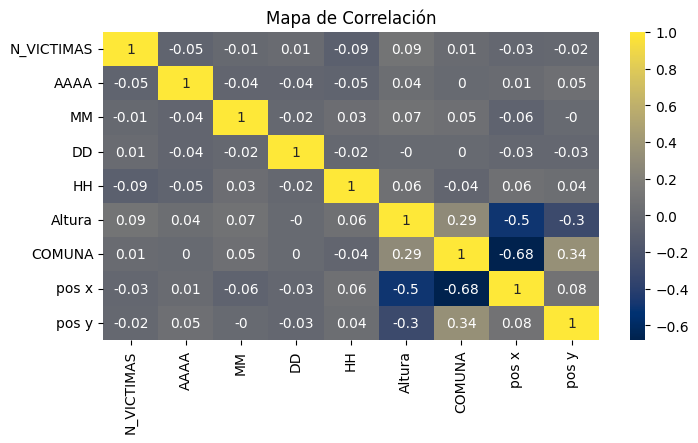

In [52]:
# Generamos un mapa con las correlaciones
dataNumerica = df_homicidios_hechos.select_dtypes(include=['number']) 
corr = dataNumerica.corr().round(2)

plt.figure(figsize=(8,4))
sns.heatmap(corr, cmap="cividis", annot=True)
plt.title('Mapa de Correlación')
plt.show()

Podemos ver relaciones esperadas como la de comuna y la altura de la calle, tambien comuna con posx(Longitud) y posy(Latitud).
Las demas correlaciones son negativas o casi tendiendo a 0 lo cual indica que no tienen correlacion directa entre si

--------------------------------------------------------------------------------

Visualización de Datos:

Histogramas para Variables Numéricas:

Podemos ver en este histograma que en la mayoria de los casos de accidentes, el numero de victimas en casi su totalidad es de 1, salvo contados accidentes donde muere mas de 1 persona.

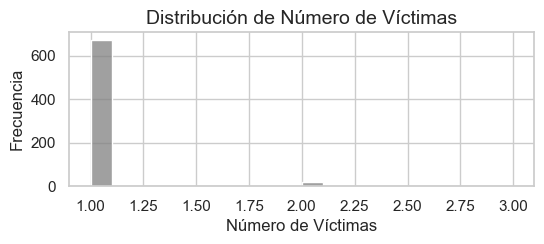

In [65]:
# Configuramos el estilo de Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(6, 2))
# Creamos el histograma
sns.histplot(df_homicidios_hechos['N_VICTIMAS'], bins=20, kde=False, color='grey')
# Personalizamos el gráfico
plt.title('Distribución de Número de Víctimas', fontsize=14)
plt.xlabel('Número de Víctimas', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
# Mostramos el gráfico
plt.show()

------------------------------------------------

En este histograma vemos la cantidad de muertes en el periodo que contiene el dataset desde el año 2016 al 2021, distribuido año a año

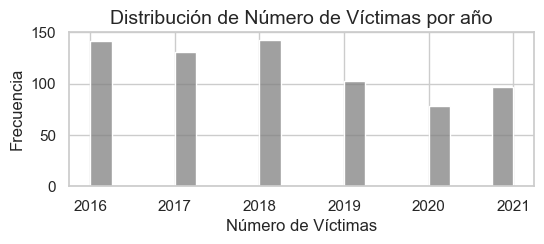

In [76]:
# Configuramos el estilo de Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(6, 2))
# Creamos el histograma
sns.histplot(df_homicidios_hechos['AAAA'], bins=20, kde=False, color='grey')
# Personalizamos el gráfico
plt.title('Distribución de Número de Víctimas por año', fontsize=14)
plt.xlabel('Número de Víctimas', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
# Mostramos el gráfico
plt.show()

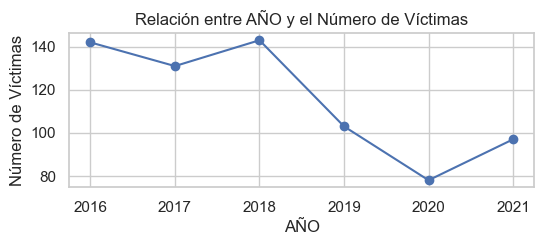

In [55]:
# Agrupar los datos por fecha y suma el número de víctimas en cada fecha
victimas_por_fecha = df_homicidios_hechos.groupby('AAAA')['N_VICTIMAS'].count().reset_index()

# Creamos la gráfica
plt.figure(figsize=(6, 2))
plt.plot(victimas_por_fecha['AAAA'], victimas_por_fecha['N_VICTIMAS'], marker='o', linestyle='-')
plt.title('Relación entre AÑO y el Número de Víctimas')
plt.xlabel('AÑO')
plt.ylabel('Número de Víctimas')
plt.grid(True)
plt.show()

-------------------------------------------------------

en este grafico de barras podemos ver la cantidad de accidentes por mes

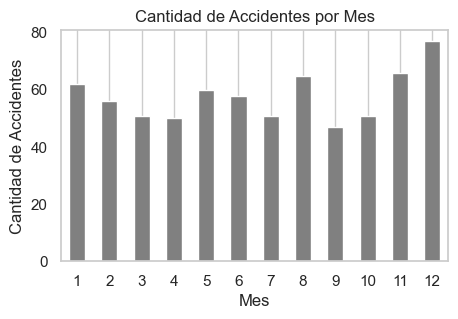

In [67]:
plt.figure(figsize=(5, 3))
df_homicidios_hechos.groupby('MM')['ID'].count().plot(kind='bar', color='grey')
plt.title('Cantidad de Accidentes por Mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Accidentes')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

-------------------------------------------------------------------------

Con este histograma podemos ver los horarios donde mas accidentes de transito se producen

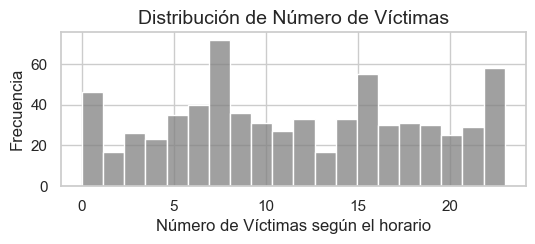

In [78]:
# Configuramos el estilo de Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(6, 2))
# Creamos el histograma
sns.histplot(df_homicidios_hechos['HH'], bins=20, kde=False, color='grey')
# Personalizamos el gráfico
plt.title('Distribución de Número de Víctimas', fontsize=14)
plt.xlabel('Número de Víctimas según el horario', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
# Mostramos el gráfico
plt.show()

------------------------------------------------------------------

Gráficos de barras para variables categóricas:

Con este grafico de barras podemos analizar la cantidad de accidentes producidos en las 4 categorias de calles que tenemos, Avenida, Gral. Paz, calle y autopista

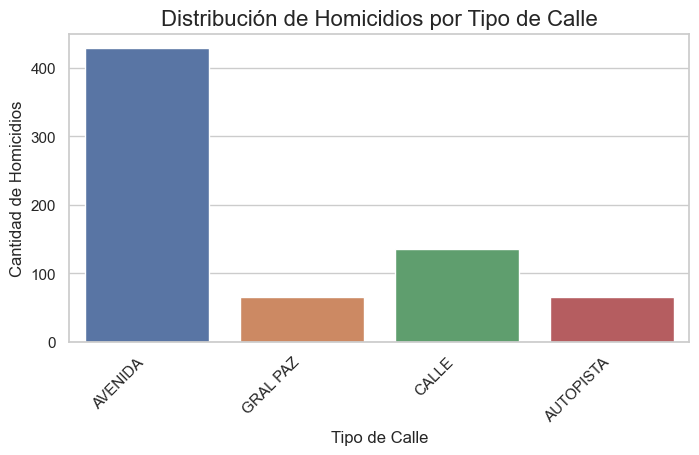

In [58]:
plt.figure(figsize=(8, 4))
sns.countplot(x='TIPO_DE_CALLE', data=df_homicidios_hechos, palette='deep')
plt.title('Distribución de Homicidios por Tipo de Calle', fontsize=16)
plt.xlabel('Tipo de Calle', fontsize=12)
plt.ylabel('Cantidad de Homicidios', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()

--------------------------------------------------------

En este grafico podemos ver la distribucion de muertes por accidentes de transito por comunas

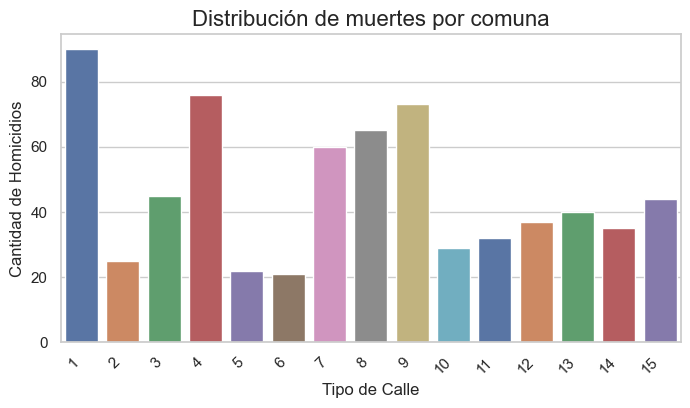

In [71]:
plt.figure(figsize=(8, 4))
sns.countplot(x='COMUNA', data=df_homicidios_hechos, palette='deep')
plt.title('Distribución de muertes por comuna', fontsize=16)
plt.xlabel('Tipo de Calle', fontsize=12)
plt.ylabel('Cantidad de Homicidios', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()

--------------------------------------------------------------------------------------------------

En el siguiente grafico de barras podemos ver el porcentaje de accidentes mortales, segun el tipo de Victima durante el 2021 que es nuestro ultimo año con informacion

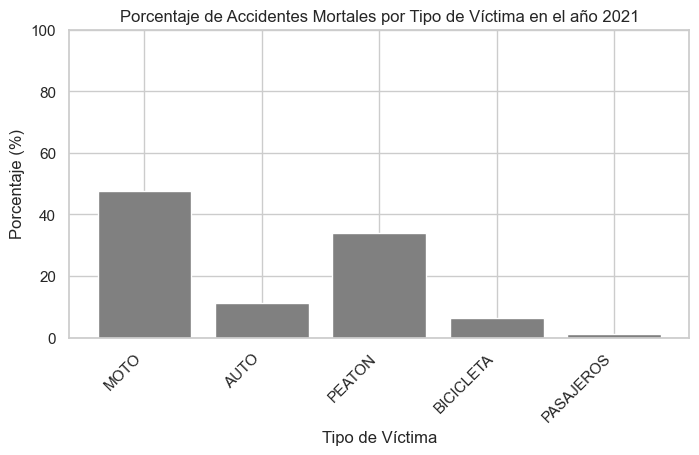

Porcentaje de Accidentes Mortales por Tipo de Víctima (2021):
MOTO: 47.42%
AUTO: 11.34%
PEATON: 34.02%
BICICLETA: 6.19%
PASAJEROS: 1.03%


In [72]:
# Filtramos los datos para el último año (2021).
filtro = (df_homicidios_hechos['AAAA'] == 2021)
df_ultimo_anio = df_homicidios_hechos[filtro]

# Contamos la cantidad de accidentes mortales de cada tipo de víctima.
tipos_victimas = ['MOTO', 'AUTO', 'PEATON', 'BICICLETA', 'PASAJEROS']
cantidades = [df_ultimo_anio[df_ultimo_anio['VICTIMA'] == tipo].shape[0] for tipo in tipos_victimas]

# Calcula el porcentaje de accidentes mortales para cada tipo de víctima.
total_accidentes = df_ultimo_anio.shape[0]
porcentajes = [(cantidad / total_accidentes) * 100 for cantidad in cantidades]

# Graficamos.
plt.figure(figsize=(8, 4))
plt.bar(tipos_victimas, porcentajes, color=['grey'])
plt.title('Porcentaje de Accidentes Mortales por Tipo de Víctima en el año 2021')
plt.xlabel('Tipo de Víctima')
plt.ylabel('Porcentaje (%)')
plt.ylim(0, 100)
plt.xticks(rotation=45, ha='right')
plt.show()

# Imprimir los porcentajes
print("Porcentaje de Accidentes Mortales por Tipo de Víctima (2021):")
for tipo, porcentaje in zip(tipos_victimas, porcentajes):
    print(f"{tipo}: {porcentaje:.2f}%")

--------------------------------------------------

Hacemos el mismo grafico pero con el año anterior (2020)

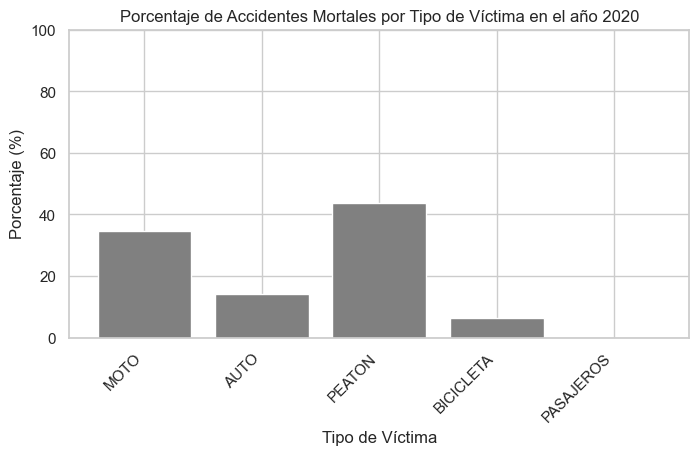

Porcentaje de Accidentes Mortales por Tipo de Víctima (2020):
MOTO: 34.62%
AUTO: 14.10%
PEATON: 43.59%
BICICLETA: 6.41%
PASAJEROS: 0.00%


In [73]:
# Filtramos los datos para el último año (2020).
filtro = (df_homicidios_hechos['AAAA'] == 2020)
df_ultimo_anio = df_homicidios_hechos[filtro]

# Contamos la cantidad de accidentes mortales de cada tipo de víctima.
tipos_victimas = ['MOTO', 'AUTO', 'PEATON', 'BICICLETA', 'PASAJEROS']
cantidades = [df_ultimo_anio[df_ultimo_anio['VICTIMA'] == tipo].shape[0] for tipo in tipos_victimas]

# Calcula el porcentaje de accidentes mortales para cada tipo de víctima.
total_accidentes = df_ultimo_anio.shape[0]
porcentajes = [(cantidad / total_accidentes) * 100 for cantidad in cantidades]

# Graficamos.
plt.figure(figsize=(8, 4))
plt.bar(tipos_victimas, porcentajes, color=['grey'])
plt.title('Porcentaje de Accidentes Mortales por Tipo de Víctima en el año 2020')
plt.xlabel('Tipo de Víctima')
plt.ylabel('Porcentaje (%)')
plt.ylim(0, 100)
plt.xticks(rotation=45, ha='right')
plt.show()

# Imprimir los porcentajes
print("Porcentaje de Accidentes Mortales por Tipo de Víctima (2020):")
for tipo, porcentaje in zip(tipos_victimas, porcentajes):
    print(f"{tipo}: {porcentaje:.2f}%")

Vamos a generar un mapa de calor para ver las comunas con mas accidentes

In [62]:
# Intenta convertir las columnas 'Latitud' y 'Longitud' en números flotantes con 'errors='coerce''
df_homicidios_hechos['pos y'] = pd.to_numeric(df_homicidios_hechos['pos y'], errors='coerce')
df_homicidios_hechos['pos x'] = pd.to_numeric(df_homicidios_hechos['pos x'], errors='coerce')

# Crea un mapa de calor utilizando las coordenadas de longitud y latitud
m = folium.Map(location=[df_homicidios_hechos['pos y'].mean(), df_homicidios_hechos['pos x'].mean()], zoom_start=14)

# Convierte los datos de longitud y latitud en una lista de listas, excluyendo valores NaN
heat_data = [[row['pos y'], row['pos x']] for index, row in df_homicidios_hechos.dropna(subset=['pos y', 'pos x']).iterrows()]

# Agrega el mapa de calor al mapa folium
HeatMap(heat_data).add_to(m)

# Ajusta la vista del mapa para que cubra el área del mapa de calor
m.fit_bounds(m.get_bounds())

# Muestra el mapa en el entorno interactivo
display(m)


--------------------------------------------

En este grafico podemos ver la relacion entre el sexo de las victimas por accidentes

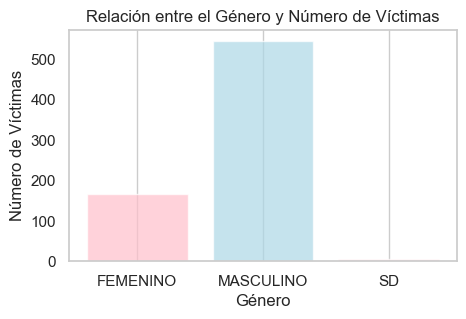

In [82]:
# Agrupa los datos por sexo y suma el número de víctimas en cada categoría
victimas_por_sexo = df_homicidios_victimas.groupby('SEXO')['VICTIMA'].count().reset_index()

# Crea la gráfica de barras sin barras de error
plt.figure(figsize=(5, 3))  # Ajusta el tamaño de la gráfica según tus preferencias
plt.bar(victimas_por_sexo['SEXO'], victimas_por_sexo['VICTIMA'], color=['pink', 'lightblue'], alpha=0.7)

# Puedes ajustar el color según tus preferencias.
# Aquí, 'pink' y 'blue' son los colores de las barras, alpha ajusta la transparencia.

plt.title('Relación entre el Género y Número de Víctimas')
plt.xlabel('Género')
plt.ylabel('Número de Víctimas')
plt.grid(axis='y')

# Mostrar la gráfica
plt.show()


-----------------------------------------------------------------

Revisamos Outliers:

df_homicidios_hechos

Se va arealizar una busqueda Outliers o valores atipicos en las columnas y despues se v va a evaluar si son realmente outliers y hay que borrarlos o que es lo que representa ese numero y lo dejamos

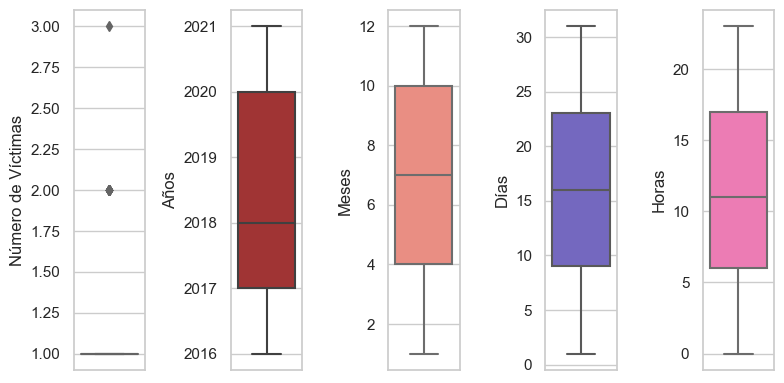

In [64]:
# Ajustamos el tamaño de la figura
plt.figure(figsize=(8, 4))

# Subplots para los gráficos 
plt.subplot(1, 5, 1) 
sns.boxplot(data=df_homicidios_hechos, y='N_VICTIMAS', color = "#FF7F50")
plt.ylabel('Número de Víctimas')

plt.subplot(1, 5, 2) 
sns.boxplot(data=df_homicidios_hechos, y='AAAA', color = "#B22222")
plt.ylabel('Años')

plt.subplot(1, 5, 3) 
sns.boxplot(data=df_homicidios_hechos, y='MM', color = "#FA8072")
plt.ylabel('Meses')

plt.subplot(1, 5, 4) 
sns.boxplot(data=df_homicidios_hechos, y='DD', color = "#6A5ACD")
plt.ylabel('Días')

plt.subplot(1, 5, 5) 
sns.boxplot(data=df_homicidios_hechos, y='HH', color = "#FF69B4")
plt.ylabel('Horas')

# Ajustar espaciado entre subplots
plt.tight_layout()
plt.show()

No se encontraron valores atipicos, en el dataset df_homicidios_hechos, la unica observacion para hacer es que en el primer grafico se muestra 2 y 3 victimas por accidente de trafico, que parecen atipicos, porque su frecuencia de suceder es poca, los datos muestran que casi ensu mayoria es 1 muerte por accidente

------------------------------------------